### Cho dữ liệu spam.csv
### Yêu cầu: đọc dữ liệu về, chuẩn hóa dữ liệu (nếu cần) và áp dụng thuật toán Naive Bayes để thực hiện việc dự đoán khả năng email là spam hay không dựa trên các thuộc tính v2
1. Tạo X_train, X_test, y_train, y_test từ dữ liệu đọc được với tỷ lệ dữ liệu test là 0.2
2. Áp dụng thuật toán Naive Bayer => kết quả
3. Đánh giá mô hình
4. Ghi mô hình
5. Đọc mô hình vừa ghi => dự đoán kết quả cho câu 6
6. Cho dữ liệu Test: x_new = np.array(['Dear Ms. Phuong. I will come on time.', 'URGENT! We are trying to contact you. Today is the last day of sale. Discount up to 50%']) => sẽ là ham hay spam?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
data = pd.read_csv("../../Data/spam.csv", encoding='latin-1')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [3]:
data['v1'].head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: v1, dtype: object

In [4]:
source = data['v2']
type(source)

pandas.core.series.Series

In [5]:
source[:5]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

In [6]:
data.groupby('v1').v2.count()

v1
ham     4825
spam     747
Name: v2, dtype: int64

In [7]:
target = data['v1']
type(target)

pandas.core.series.Series

In [8]:
target = target.replace("ham", 0)
target = target.replace("spam", 1)
target[:5]

0    0
1    0
2    1
3    0
4    0
Name: v1, dtype: int64

In [9]:
temp = pd.DataFrame(target)

In [10]:
temp.head()

,v1
0,0
1,0
2,1
3,0
4,0


In [11]:
text_data = np.array(source)
text_data

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [12]:
target_data = np.array(target)
target_data

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [13]:
count = CountVectorizer()
count.fit(text_data)
bag_of_words = count.transform(text_data)
bag_of_words

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [14]:
X = bag_of_words.toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
X.shape

(5572, 8672)

In [16]:
y = np.array(target)

In [17]:
y.shape

(5572,)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [19]:
clf = MultinomialNB()
model = clf.fit(X_train, y_train)

In [20]:
y_pred = clf.predict(X_test)

In [21]:
print('score Scikit learn - train: ', model.score(X_train,y_train))

score Scikit learn - train:  0.9925959165357864


In [22]:
print('score Scikit learn: ', model.score(X_test,y_test))

score Scikit learn:  0.9865470852017937


In [23]:
print("Accuracy is ", accuracy_score(y_test,y_pred)*100,"%")

Accuracy is  98.65470852017937 %


#### Nhận xét:
Cả training và testing đều có Score cao

In [24]:
confusion_matrix(y_test, y_pred, labels=[0, 1])

array([[958,  11],
       [  4, 142]], dtype=int64)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       969
           1       0.93      0.97      0.95       146

    accuracy                           0.99      1115
   macro avg       0.96      0.98      0.97      1115
weighted avg       0.99      0.99      0.99      1115



### Nhận xét:
Có precision cao, recall cao

In [26]:
y_prob = model.predict_proba(X_test)
y_prob

array([[9.99959372e-01, 4.06280193e-05],
       [9.99999345e-01, 6.55454132e-07],
       [9.99999855e-01, 1.44802703e-07],
       ...,
       [9.49005952e-01, 5.09940478e-02],
       [7.08245575e-01, 2.91754425e-01],
       [9.99999987e-01, 1.32780153e-08]])

In [27]:
roc_auc_score(y_test, y_prob[:, 1])

0.9992366088468553

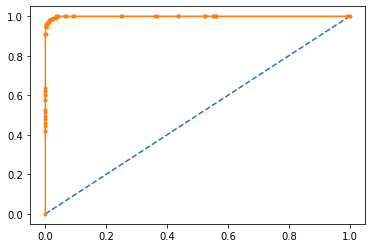

In [28]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

#### ROC cao
#### Dựa trên tất cả các đánh giá => Model phù hợp

In [29]:
pkl_filename = "ham_spam_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)
    # luu model CountVectorizer (count) theo cach tren

In [30]:
# Đọc model
with open(pkl_filename, 'rb') as file:
    ham_spam_model = pickle.load(file)
    # doc model count len

In [31]:
x_new = np.array(['Dear Ms. Phuong. I will come on time.', 'URGENT! We are trying to contact you. Today is the last day of sale. Discount up to 50%'])
x_new = count.transform(x_new)

In [32]:
y_pred_new = ham_spam_model.predict(x_new)
y_pred_new

array([0, 1], dtype=int64)